#Logika rozmyta



Została zaproponowana przez Lotfi Zadeha, jest ściśle powiązana z jego teorią zbiorów rozmytych. W logice rozmytej między stanem 0 (fałsz) a stanem 1 (prawda) rozciąga się szereg wartości pośrednich, które określają stopień przynależności elementu do zbioru. Daje ona nam większą siłę wyrazu kiedy dane zjawisko nie da się przyporządkować do dychotomicznych wartości prawda fałsz 0 lub 1. Znajduje szerokie zastosowania w automatyce przemysłowej, systemach sterowania, eksploracji danych i systemach ekspertowych



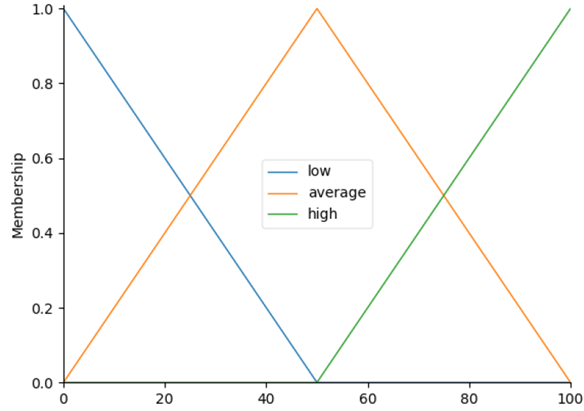

#Zbiór rozmyty

Zbiór ze zdefiniowaną funkcją przynależności przyjmującą wartość z przedziału [0,1]

$A = \{(x,𝜂ₐ(x))|x ∈ X\}$

gdzie $𝜂ₐ:x→[0,1]$

Przykład:

$A = \{(1, 0.5),(3, 0.8),(5, 0.2)\}$


Istnieją różne funkcje przynależność najbardziej typowe to trójkątna i trapezowa oraz s-funkcja

# Simpful
Dziś skorzystamy z biblioteki [simpful](https://github.com/aresio/simpful) jedna z prostszych i przyjażniejszych bibliotek pozwalająca realizować zadania logiki rozmytej. W logice rozmytej mamy 3 główne etapy


1.   Fuzzify(rozmycie) - Zamień wszystkie wartości wejściowe w rozmyte funkcje członkostwa.

2.   Wykonaj wszystkie odpowiednie reguły w bazie reguł, aby obliczyć rozmyte funkcje wyjściowe.

3. De-fuzzify(skupienie) - Usuń fuzzyfikację rozmytych funkcji wyjściowych, aby uzyskać „wyraźne” wartości wyjściowe.



 Najpierw ją zaimportujemy.

In [ ]:
!pip install simpful

#Rozmycie

pierwszym etapem jest stwożenie naszych zbiorów rozmytych i zdefiniowanie dla nich fynkcji członkostwa.

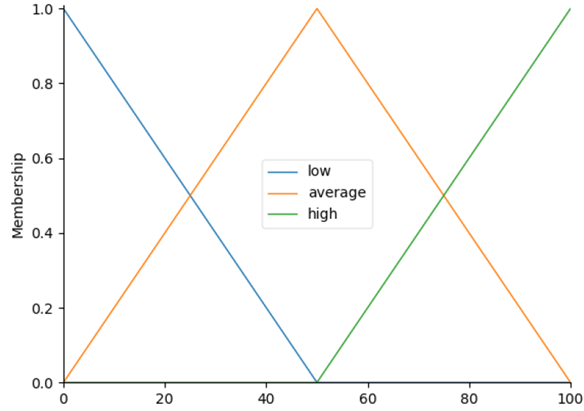


Tworzymy funkcje członkostwa
```
low = TriangleFuzzySet(a=0, b=0, c=50, term="low")
avg = TriangleFuzzySet(a=0, b=50, c=100, term="average")
high = TriangleFuzzySet(a=50, b=100, c=100, term="high")
```

Następnie tworzymy zbiór rozmyty w zakresie 0, 100 i przypisujemy  mu wcześniej zadeklarowane funkcje przynajeżności


```
FS.add_linguistic_variable("wat_qua", LinguisticVariable([low,avg,high], universe_of_discourse=[0, 100]))
FS.plot_variable("wat_qua")
```





## Zadanie 1
w ramach ćwiczenia zdefiniujemy sobie prosty sterownik do ekspresu do kawy ma 3 zmienne wejściowe, 15 reguł oraz jedną zmienną wyjściową. Na początek
zdefiniuj 3 zbiory rozmyte wraz z funkcjami członkostwa odpowiadające tym wykresom:


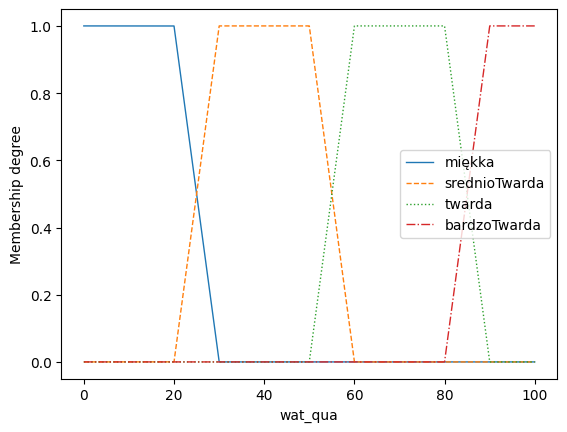

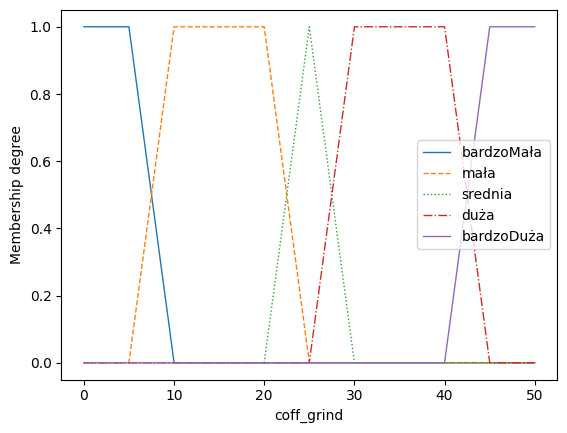

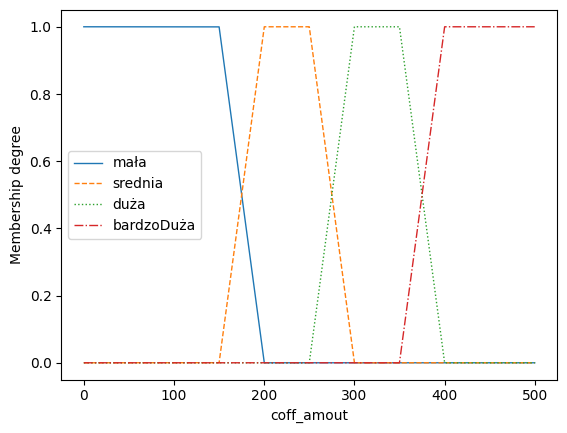

SyntaxError: invalid syntax (341162698.py, line 5)

# Reguły

Reguły wnioskowania, definicje użytych operatorów (agregacja). W poniższym kodzie używany jest wyłącznie operator AND, który jest zdefiniowany jako minimum operandów (MIN). Operator OR definiuje się zazwyczaj jako maximum (MAX). Następnie definiowana jest funkcja aktywacji (MIN lub PROD), określająca stopień przynależności konkluzji w oparciu o stopień przynależności przesłanki. Kluczowym elementem jest sam zbiór reguł rozmytych wyznaczających logikę sterownika.



```
RULE1 = "IF (poziom_natezenia IS bardzoCicho) THEN (zmiana_natezenia IS przycisz)"
RULE2 = "IF (poziom_natezenia IS cicho) THEN (zmiana_natezenia IS przycisz)"
RULE3 = "IF  ((poziom_natezenia IS glosno) AND (pora_dnia IS noc)) THEN (zmiana_natezenia IS zostaw)"
FS.add_rules([RULE1, RULE2, RULE3])

```



## Zadanie 2

Zdefiniuj brakujace reguły zgodnie z tabelami.




twardosc_wody  | ilosc_kawy | temperatura_wody
---------------|------------|---------
srednioTwarda  | Mała       | ciepła
srednioTwarda  | średnia    | gorąca
srednioTwarda  | duża       | gorąca


twardosc_wody  | grubość_mielenia | temperatura_wody
---------------|------------|---------
srednioTwarda  | Mała       | ciepła
srednioTwarda  | średnia    | ciepła
srednioTwarda  | duża       | gorąca





In [ ]:

FS.add_rules([
	"IF (coff_amout IS bardzoDuża) THEN (wat_temp IS bardzoGorąca)",
	"IF (wat_qua IS bardzoTwarda) OR (coff_grind IS bardzoMała) THEN (wat_temp IS ciepla)",
	"IF (wat_qua IS miękka) OR (coff_grind IS bardzoDuża) THEN (wat_temp IS bardzoGorąca)",
    "",
    "",
    "",
    "",
    "",
    "",
    "IF (wat_qua IS twarda) AND (coff_amout IS mała) THEN (wat_temp IS ciepła)",
    "IF (wat_qua IS twarda) AND (coff_amout IS srednia) THEN (wat_temp IS ciepła)",
    "IF (wat_qua IS twarda) AND (coff_amout IS duża) THEN (wat_temp IS gorąca)",
    "IF (wat_qua IS twarda) AND (coff_grind IS mała) THEN (wat_temp IS ciepła)",
    "IF (wat_qua IS twarda) AND (coff_grind IS srednia) THEN (wat_temp IS ciepła)",
    "IF (wat_qua IS twarda) AND (coff_grind IS duża) THEN (wat_temp IS gorąca)"
	])


# Skupienie

określa wyostrzenie zmiennej wyjściowej. Wygląda to tak samo rozmycie mamdani, dla sugeno działa to inaczej

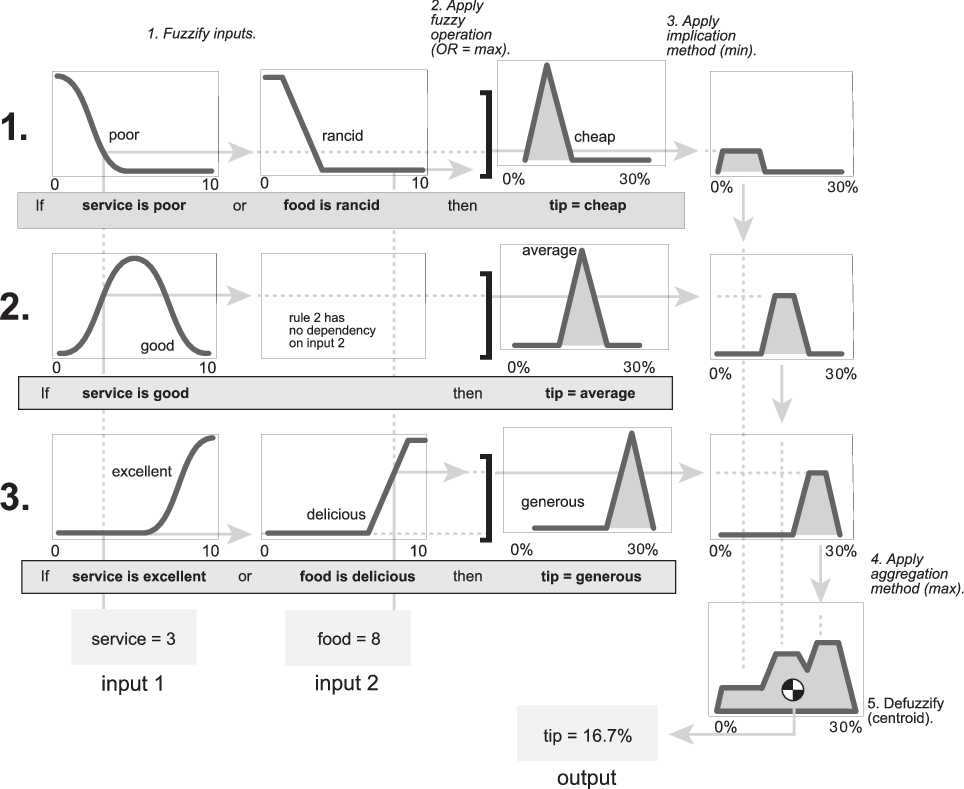

Sugeno kożysta z innego podejścia,  wyjściowa funkcja członkostwa jest albo stałą albo funkcją liniową.

reguły działają tak:


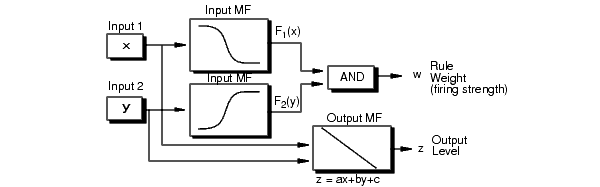

każda reguła wytważa 2 wartości w i z

zᵢ=aᵢx+bᵢy+cᵢ of zᵢ = const

wᵢ = AND(F1(x), F2(x))

i ostateczny wynik to $\dfrac{\sum_{i=1}^{n}(w_iz_i)}{\sum_{i=1}^{n}(w_i)}$


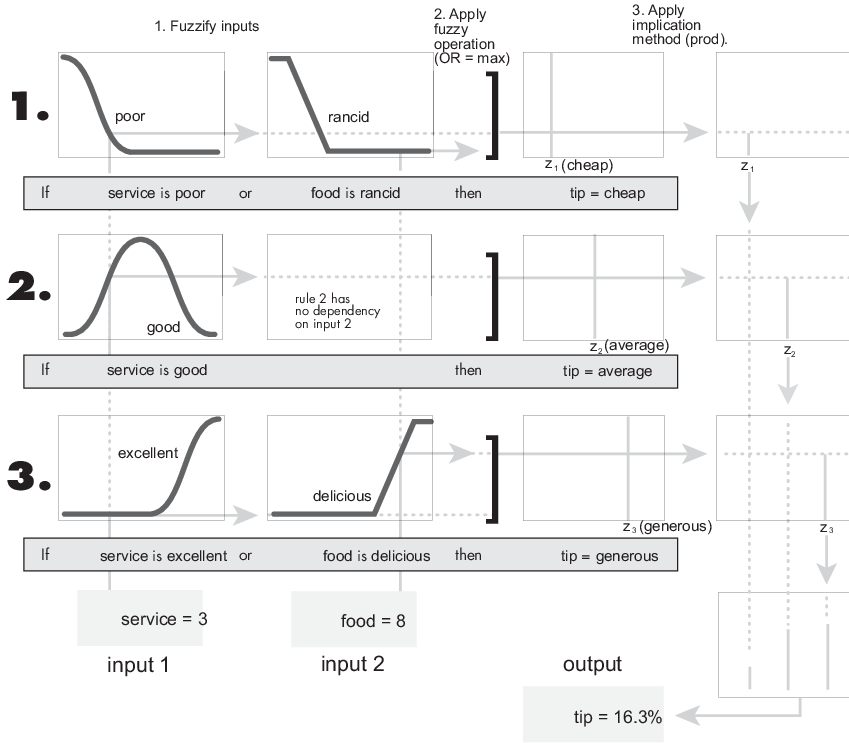

## Zadanie 3
Zdefiniuj skupienie zgodne z podjesciem mamdami i wykresem poniżej

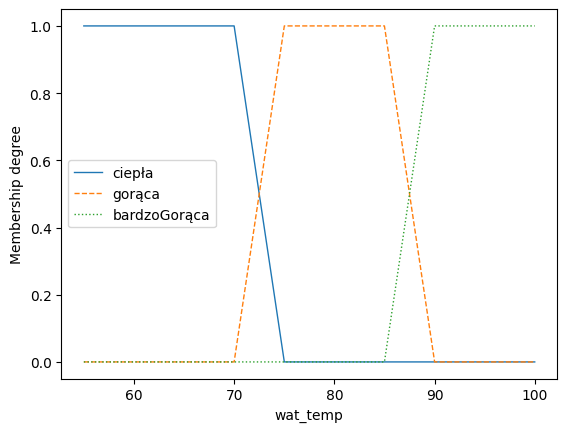

In [ ]:
Tra_1 = ???
Tra_2 = ???
Tra_3 = ???
FS.add_linguistic_variable("wat_temp",  LinguisticVariable([Tra_1, Tra_2, Tra_3], universe_of_discourse=[55, 100]))
FS.plot_variable("wat_temp")

# Użycie
Skoro zdefiniowaliśmy, już zbiory rozmyte, reguły wnioskowania, oraz wyostrzenie to pozostało nam tylko jedno spróbować czy nasz sterownik działa.

In [ ]:
FS.set_variable("coff_amout", 200)
FS.set_variable("wat_qua", 30)
FS.set_variable("coff_grind", 30)

temp = FS.inference()

In [ ]:
temp

# Zadanie
Napisz własny sterownik rozmyty co najmniej tak skomplikowany jak ten z zajęć